# Importing Python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Sentimental Analysis

Loading the Dataset

In [3]:
df=pd.read_csv("/content/reviews.csv")
df = df.drop_duplicates()
df

,headline,reviewBody,ratingValue
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0
...,...,...,...
301,Dead on arrival,"Laptop dead on arrival, still waiting on a rep...",1.0
302,Bad Quality,"Bad Quality, overheating, and keyboard/trackpa...",1.0
303,Hassles with installation of Win 11,Laptop did not come with the required security...,1.0
304,Broken Device,Laptop is broken and Customer Support is not h...,1.0


Exploring the Dataset

In [4]:
df['char_count'] = df['headline'].str.len() ## this also includes spaces
df[['headline','char_count']].head()

,headline,char_count
0,Super light and efficient laptop,32
1,NEW laptop is great,19
2,Lightweight powerhouse.,23
3,Great Laptop for Work,21
4,Practical Solid Laptop,22


In [5]:
df['word_count'] = df['headline'].apply(lambda x: len(str(x).split(" ")))
df[['headline','word_count']].head()

,headline,word_count
0,Super light and efficient laptop,5
1,NEW laptop is great,4
2,Lightweight powerhouse.,2
3,Great Laptop for Work,4
4,Practical Solid Laptop,3


In [6]:
df['char_count'] = df['reviewBody'].str.len() ## this also includes spaces
df[['reviewBody','char_count']].head()

,reviewBody,char_count
0,Super light and efficient laptop. Crisp & cle...,118
1,so far I am loving the new look and the feel o...,62
2,Great build quality \ excellent screen \ very ...,232
3,Excellent laptop for work. Processor was able ...,98
4,"So far so good, I like it has an HDMI, USB-C &...",258


In [7]:
df['word_count'] = df['reviewBody'].apply(lambda x: len(str(x).split(" ")))
df[['reviewBody','word_count']].head()

,reviewBody,word_count
0,Super light and efficient laptop. Crisp & cle...,21
1,so far I am loving the new look and the feel o...,15
2,Great build quality \ excellent screen \ very ...,38
3,Excellent laptop for work. Processor was able ...,16
4,"So far so good, I like it has an HDMI, USB-C &...",52


In [8]:
# Basic statistics for numerical data
print(df.describe())

       ratingValue   char_count  word_count
count   305.000000   306.000000  306.000000
mean      4.350820   194.516340   34.464052
std       1.102423   294.009214   50.383972
min       1.000000    23.000000    1.000000
25%       4.000000    52.000000    9.000000
50%       5.000000   102.000000   18.000000
75%       5.000000   213.250000   41.000000
max       5.000000  2354.000000  377.000000


# Handling Missing Values

In [9]:
# Drop rows with missing values, if any
df.dropna(subset=['reviewBody'], inplace=True)

# Exploring Data using Visualizations

In [10]:
# Join all headlines
text = ' '.join(df['reviewBody'].astype(str).tolist())

<ipython-input-11-35f36eaa48de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ratingValue', data=df, palette="viridis")


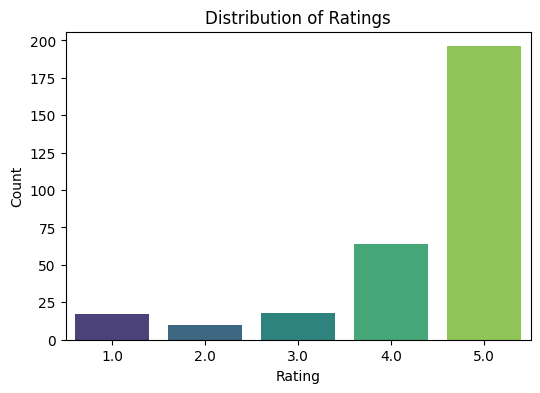

In [11]:
# Distribution of ratings with customized colors
plt.figure(figsize=(6, 4))
sns.countplot(x='ratingValue', data=df, palette="viridis")
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

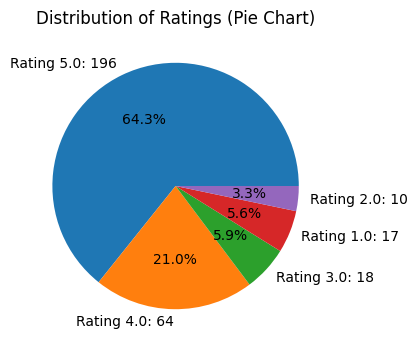

In [12]:
# prompt: prompt: do eda for scaling on 5 using pie chart and show how many members for each ratings and give the code as well

# Pie chart for the number of members for each rating
plt.figure(figsize=(6, 4))
rating_counts = df['ratingValue'].value_counts()
labels = [f'Rating {rating}: {count}' for rating, count in rating_counts.items()]
plt.pie(rating_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Ratings (Pie Chart)')
plt.show()


In [13]:
# Frequency Counts
print("Frequency Counts:")
print(df['ratingValue'].value_counts())

Frequency Counts:
5.0    196
4.0     64
3.0     18
1.0     17
2.0     10
Name: ratingValue, dtype: int64


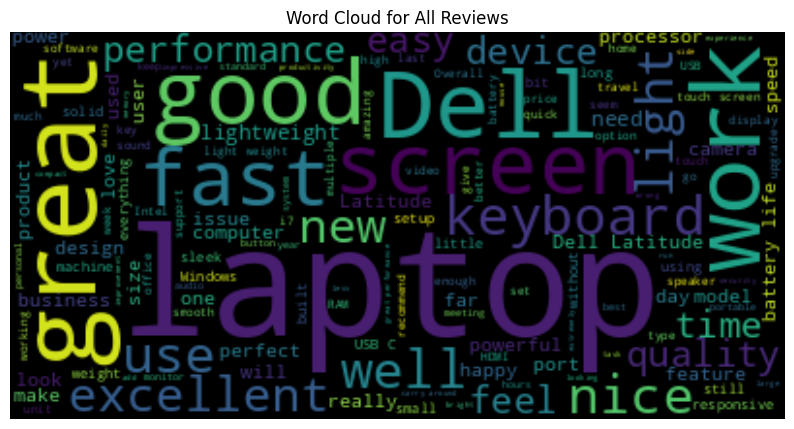

In [14]:
# WordCloud for all reviews
wordcloud = WordCloud(background_color='black').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Reviews')
plt.show()

In [15]:
# Function to calculate sentiment
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity


In [16]:
# Apply function to review bodies
df['sentiment'] = df['reviewBody'].apply(get_sentiment)

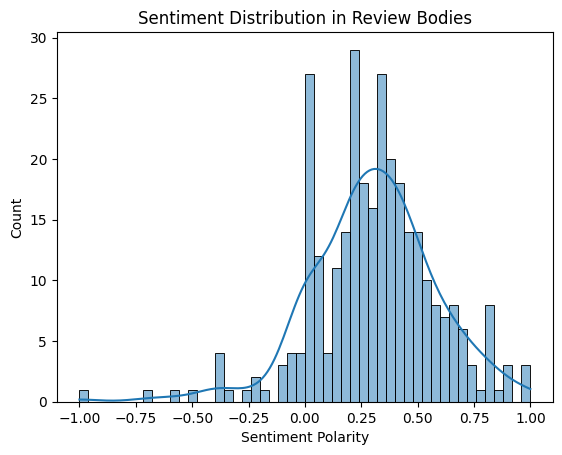

In [17]:
# Sentiment Analysis
sns.histplot(df['sentiment'], bins=50, kde=True)
plt.title('Sentiment Distribution in Review Bodies')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()

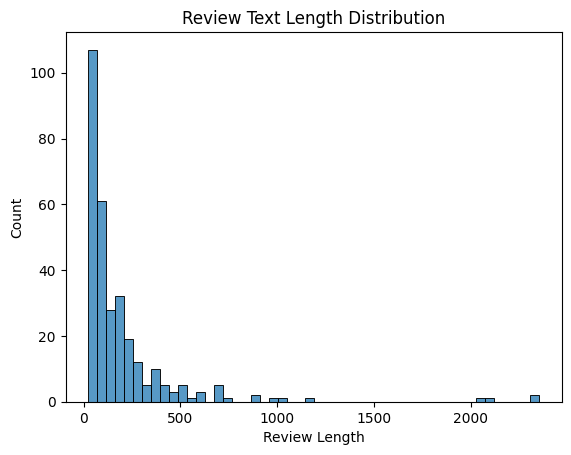

In [18]:
# Text Length Analysis
df['review_length'] = df['reviewBody'].apply(len)
sns.histplot(df['review_length'], bins=50)
plt.title('Review Text Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

<ipython-input-19-27f03f9bad02>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ratingValue', y='sentiment', data=df, palette=custom_palette)
<ipython-input-19-27f03f9bad02>:6: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.boxplot(x='ratingValue', y='sentiment', data=df, palette=custom_palette)


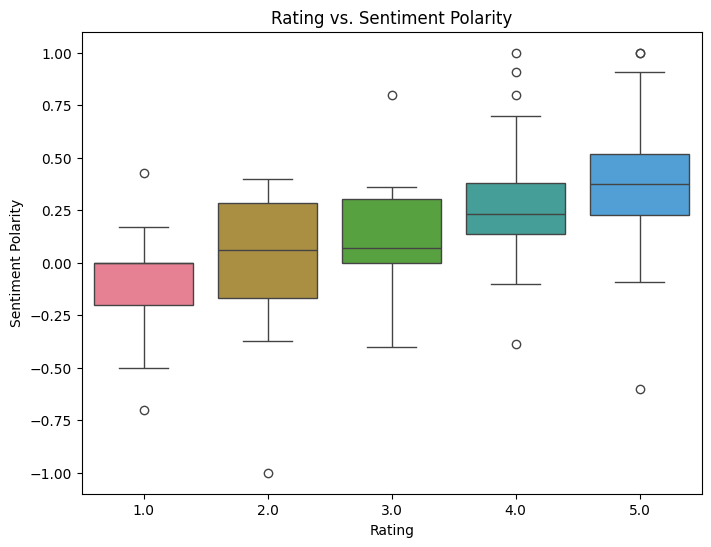

In [19]:
# Define a custom color palette
custom_palette = sns.color_palette("husl", len(df['ratingValue'].unique()))

# Bivariate Analysis: Rating vs. Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='ratingValue', y='sentiment', data=df, palette=custom_palette)
plt.title('Rating vs. Sentiment Polarity')
plt.xlabel('Rating')
plt.ylabel('Sentiment Polarity')
plt.show()


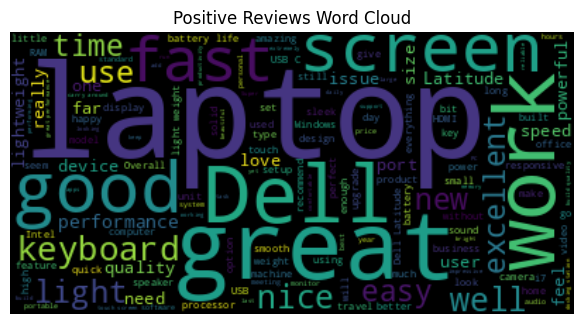

In [20]:
# Word Frequency by Sentiment
positive_reviews = ' '.join(df[df['sentiment'] > 0]['reviewBody'].astype(str).tolist())
negative_reviews = ' '.join(df[df['sentiment'] < 0]['reviewBody'].astype(str).tolist())

wordcloud_pos = WordCloud(background_color='black').generate(positive_reviews)
wordcloud_neg = WordCloud(background_color='black').generate(negative_reviews)

plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()


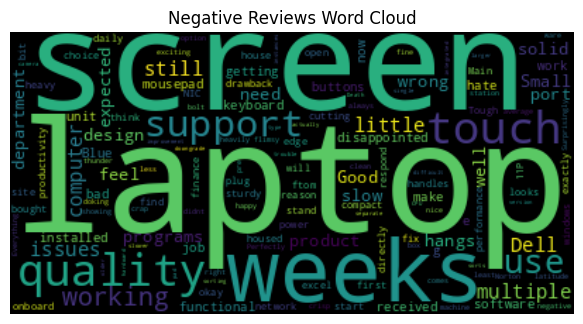

In [21]:
plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()


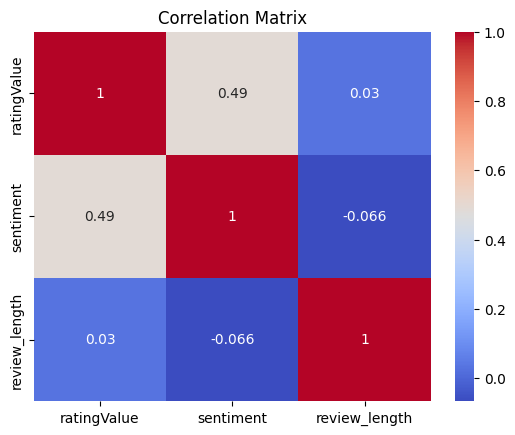

In [22]:
# Correlation Matrix
sns.heatmap(df[['ratingValue', 'sentiment', 'review_length']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

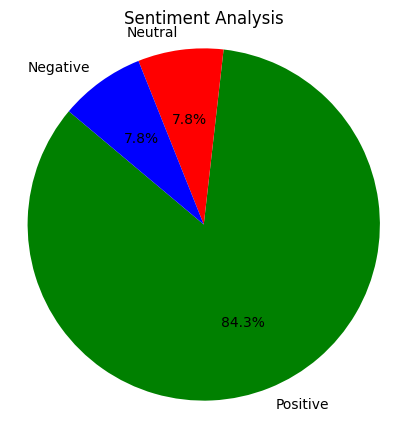

In [23]:
# Drop rows with missing values, if any
df.dropna(subset=['reviewBody'], inplace=True)

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis function to each review text
df['sentiment'] = df['reviewBody'].apply(analyze_sentiment)

# Pie chart for sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'blue'])
plt.title('Sentiment Analysis')
plt.axis('equal')
plt.show()

In [24]:
import string
import re
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['reviewBody']= df['reviewBody'].apply(lambda x: cleaning_punctuations(x))
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)
df['reviewBody'] = df['reviewBody'].apply(lambda x: cleaning_repeating_char(x))
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['reviewBody'] = df['reviewBody'].apply(lambda x: cleaning_numbers(x))

In [25]:
# Drop rows with missing values, if any
df.dropna(subset=['reviewBody'], inplace=True)

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 0
    else:
        return 1

# Apply sentiment analysis function to each review text
df['sentiment'] = df['reviewBody'].apply(analyze_sentiment)

# Displaying the sentiment analysis results
print(df[['reviewBody', 'sentiment']])

                                            reviewBody  sentiment
0    Super light and eficient laptop Crisp clean sc...          0
1    so far I am loving the new lok and the fel of ...          0
2    Great build quality excelent scren very god po...          0
3    Excelent laptop for work Procesor was able to ...          0
4    So far so god I like it has an HDMI USBC A por...          0
..                                                 ...        ...
301  Laptop dead on arival stil waiting on a replac...          1
302  Bad Quality overheating and keyboardtrackpad i...          1
303  Laptop did not come with the required security...          1
304  Laptop is broken and Customer Suport is not he...          1
319  Dels Latitude  Ultralight in impreses with a s...          0

[306 rows x 2 columns]


In [26]:
# Apply sentiment analysis function to each review text
df['sentiment'] = df['reviewBody'].apply(analyze_sentiment)

In [27]:
# Tokenization, Stop words removal, Stemming, and Lemmatization
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [28]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.isalnum()]
    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized_tokens)

In [29]:
# Apply text preprocessing
df['clean_text'] = df['reviewBody'].apply(preprocess_text)


In [30]:
df['clean_text']

0      super light eficient laptop crisp clean scren ...
1                      far loving new lok fel new laptop
2      great build quality excelent scren god port op...
3      excelent laptop work procesor able handle work...
4      far god like hdmi usbc port instead al usbc po...
                             ...                        
301          laptop dead arival stil waiting replacement
302       bad quality overheating keyboardtrackpad isues
303    laptop come required security software require...
304                laptop broken customer suport helpful
319    dels latitude ultralight impreses slek design ...
Name: clean_text, Length: 306, dtype: object

# SPlitting Dataset into X and Y

In [31]:
# Split the dataset into features (X) and target variable (Y)
X = df['clean_text']  # Assuming 'reviewBody' is the column containing the review text
Y = df['sentiment']

# Training and Testing the Dataset

In [32]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Naive Bayes

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Train machine learning models
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, Y_train)

Y_pred_train = nb_classifier.predict(X_train_vectorized)
Y_pred_test = nb_classifier.predict(X_test_vectorized)

train_accuracy = accuracy_score(Y_train, Y_pred_train)
Accuracy_NB = accuracy_score(Y_test, Y_pred_test)

print(f"==================== nb_classifier ====================")
print("Training Accuracy:", train_accuracy.round(2))
print("Test Accuracy:", Accuracy_NB.round(2))

==================== nb_classifier ====================
Training Accuracy: 0.78
Test Accuracy: 0.76


# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_vectorized, Y_train)

Y_pred_train = log_reg.predict(X_train_vectorized)
Y_pred_test = log_reg.predict(X_test_vectorized)

train_accuracy = accuracy_score(Y_train, Y_pred_train)
Accuracy_LR = accuracy_score(Y_test, Y_pred_test)

print(f"==================== Logistic Regression ====================")
print("Training Accuracy:", train_accuracy.round(2))
print("Test Accuracy:", Accuracy_LR.round(2))


==================== Logistic Regression ====================
Training Accuracy: 0.76
Test Accuracy: 0.76


# Support Vector Machine

In [35]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectorized, Y_train)


Y_pred_train = log_reg.predict(X_train_vectorized)
Y_pred_test = log_reg.predict(X_test_vectorized)

train_accuracy = accuracy_score(Y_train, Y_pred_train)
Accuracy_SVM = accuracy_score(Y_test, Y_pred_test)

print(f"==================== svm_classifier ====================")
print("Training Accuracy:", train_accuracy.round(2))
print("Test Accuracy:", Accuracy_SVM.round(2))


==================== svm_classifier ====================
Training Accuracy: 0.76
Test Accuracy: 0.76


# K-Nearest Neighbour

In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)

KNN.fit(X_train_vectorized,Y_train)

Y_pred_train = KNN.predict(X_train_vectorized)
Y_pred_test  = KNN.predict(X_test_vectorized)

# step6:  metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
ac_train = accuracy_score(Y_train,Y_pred_train)
Accuracy_KNN = accuracy_score(Y_test,Y_pred_test)
print(f"==================== KNeighborsClassifier ====================")
print("Training Accuracy:", ac_train.round(2))
print("Test Accuracy:", Accuracy_KNN.round(2))


==================== KNeighborsClassifier ====================
Training Accuracy: 0.82
Test Accuracy: 0.79


# Decision Tree Classifier

In [37]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')

DT.fit(X_train_vectorized, Y_train)
Y_pred_train = DT.predict(X_train_vectorized)
Y_pred_test = DT.predict(X_test_vectorized)

train_accuracy = accuracy_score(Y_train, Y_pred_train)
Accuracy_DTC = accuracy_score(Y_test, Y_pred_test)

print(f"==================== Decision Tree ====================")
print("Training Accuracy:", train_accuracy.round(2))
print("Test Accuracy:", Accuracy_DTC.round(2))


==================== Decision Tree ====================
Training Accuracy: 1.0
Test Accuracy: 0.77


# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_vectorized, Y_train)

Y_pred_train = rf_classifier.predict(X_train_vectorized)
Y_pred_test = rf_classifier.predict(X_test_vectorized)

train_accuracy = accuracy_score(Y_train, Y_pred_train)
Accuracy_RFC = accuracy_score(Y_test, Y_pred_test)

print(f"==================== RandomForestClassifier ====================")
print("Training Accuracy:", train_accuracy.round(2))
print("Test Accuracy:", Accuracy_RFC.round(2))


==================== RandomForestClassifier ====================
Training Accuracy: 1.0
Test Accuracy: 0.79


In [39]:
# Evaluate models and store results in a dictionary
results = {}
classifiers = {
    "Naive Bayes": nb_classifier,
    "Logistic Regression": log_reg,
    "Support Vector Machine": svm_classifier,
    "KNeighborsClassifier": KNN,
    "DecisionTreeClassifier": DT,
    "Random Forest": rf_classifier
}

for name, classifier in classifiers.items():
    Y_pred_train = classifier.predict(X_train_vectorized)
    Y_pred_test = classifier.predict(X_test_vectorized)

    train_accuracy = accuracy_score(Y_train, Y_pred_train)
    test_accuracy = accuracy_score(Y_test, Y_pred_test)

    results[name] = {
        "Training Accuracy": train_accuracy.round(2),
        "Testing Accuracy": test_accuracy.round(2),
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T

# Display the results table
print(results_df)

                        Training Accuracy  Testing Accuracy
Naive Bayes                          0.78              0.76
Logistic Regression                  0.76              0.76
Support Vector Machine               0.98              0.77
KNeighborsClassifier                 0.82              0.79
DecisionTreeClassifier               1.00              0.77
Random Forest                        1.00              0.79


<ipython-input-40-eff07c4dafaf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = models , y = accuracies, palette = "magma", saturation =1.5)


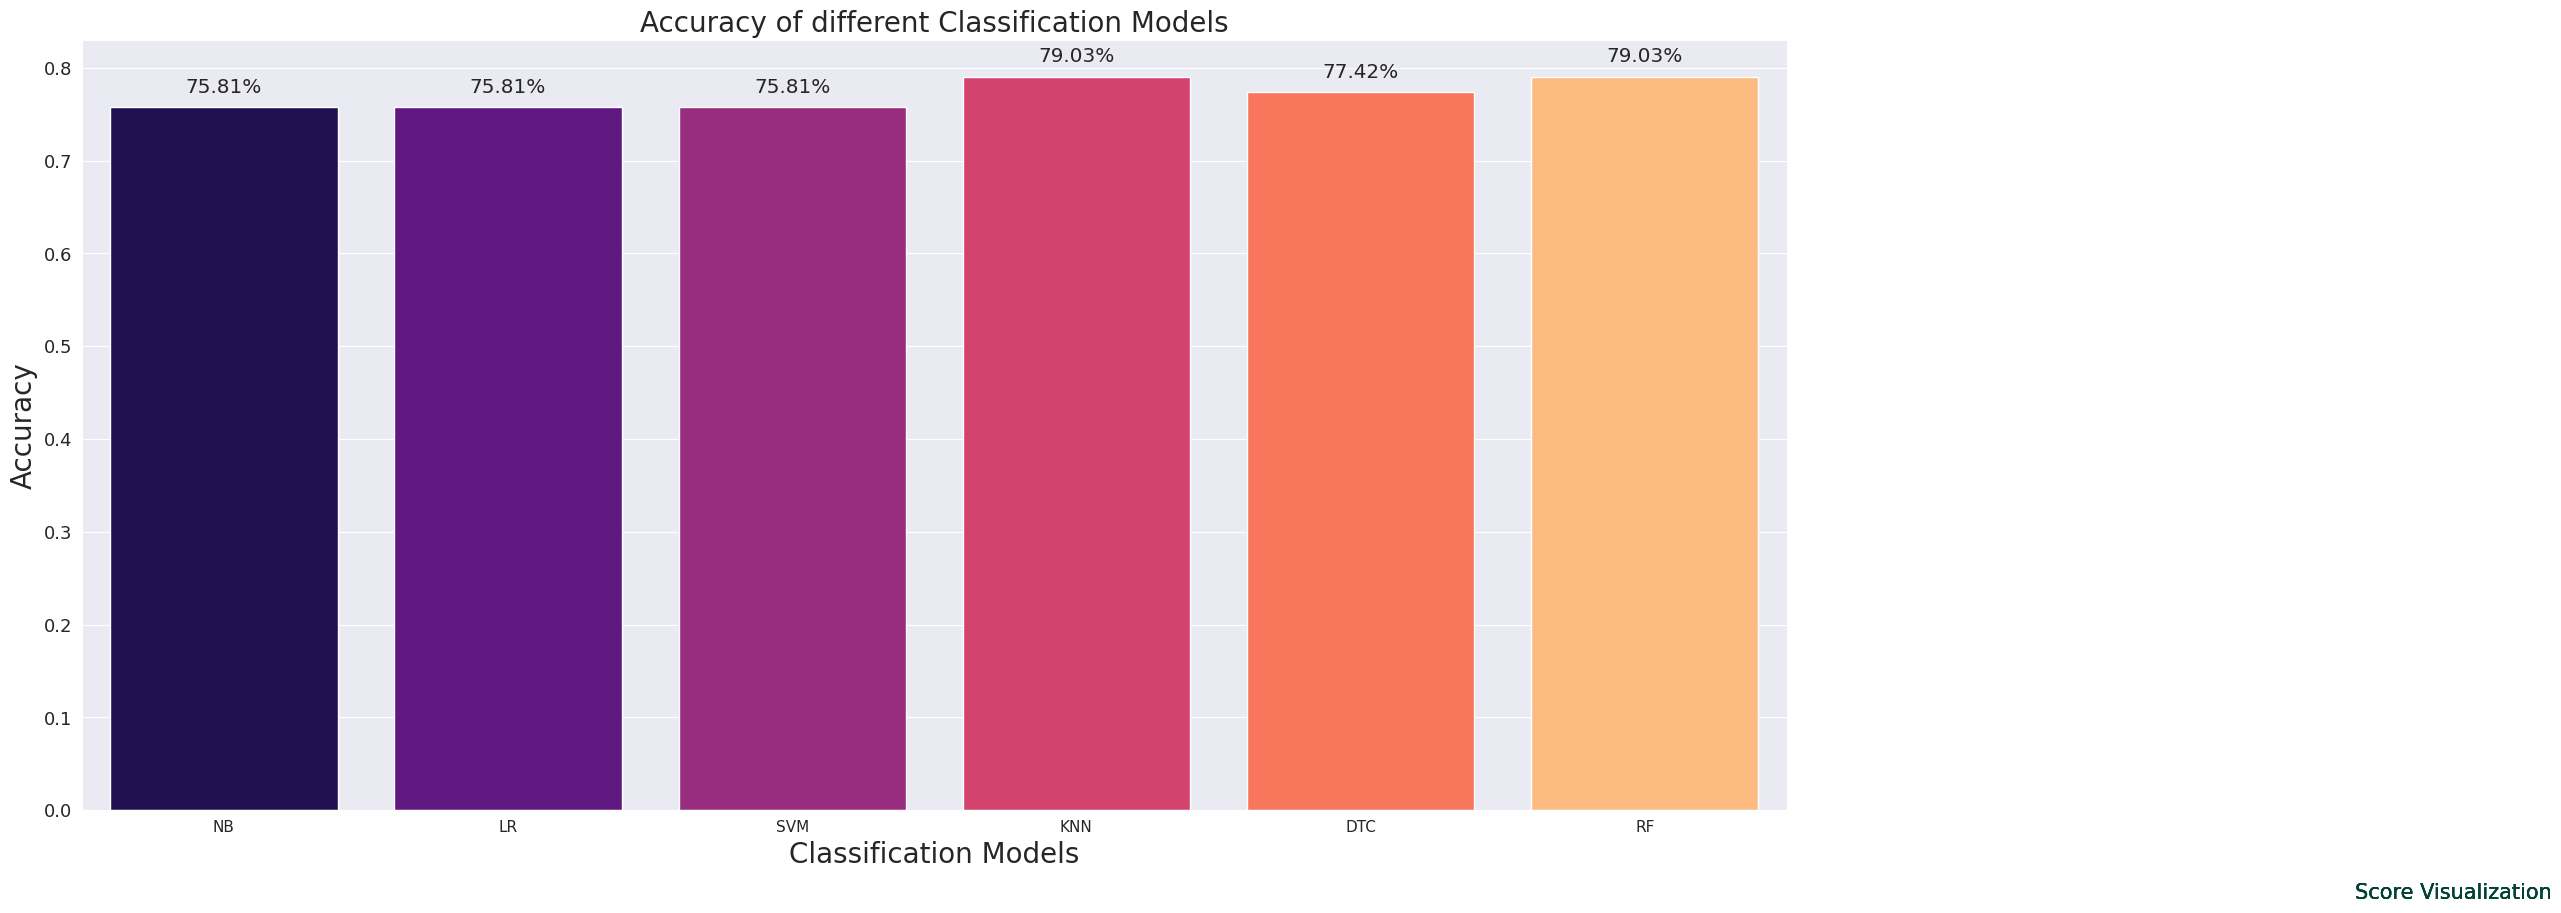

In [40]:
models = ['NB','LR','SVM','KNN','DTC' ,'RF']
accuracies = [Accuracy_NB, Accuracy_LR , Accuracy_SVM , Accuracy_KNN , Accuracy_DTC , Accuracy_RFC]
plt.figure(figsize=(22, 10))
sns.set_style("darkgrid")
ax = sns.barplot(x = models , y = accuracies, palette = "magma", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
     #Add Text watermark
    plt.text(7.5, -0.1, 'Score Visualization' ,fontsize = 15,
             color ='#034235', ha ='left', va ='bottom',
             alpha = 0.7)

plt.show()

In [41]:
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
rf_classifier = RandomForestClassifier(n_estimators= 2000, min_samples_split=2, min_samples_leaf=2,max_depth = 2, min_impurity_decrease=100,min_weight_fraction_leaf=0.5)
rf_classifier.fit(X_train_vectorized, Y_train)

Y_pred_train = rf_classifier.predict(X_train_vectorized)
Y_pred_test = rf_classifier.predict(X_test_vectorized)

train_accuracy = accuracy_score(Y_train, Y_pred_train)
Accuracy_RFC = accuracy_score(Y_test, Y_pred_test)

print(f"==================== RandomForestClassifier ====================")
print("Training Accuracy:", train_accuracy.round(2))
print("Test Accuracy:", Accuracy_RFC.round(2))


==================== RandomForestClassifier ====================
Training Accuracy: 0.76
Test Accuracy: 0.76


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the class weights
class_weights = {0: 1, 1: 2.8}

# Create a Random Forest classifier
rf = RandomForestClassifier(class_weight=class_weights)

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='f1_macro')

# Perform the grid search
grid_search.fit(X_train_vectorized, Y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test_vectorized)

# Evaluate the best model
print(classification_report(Y_test, y_pred))

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)


              precision    recall  f1-score   support

           0       0.89      0.89      0.89        47
           1       0.67      0.67      0.67        15

    accuracy                           0.84        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.84      0.84      0.84        62

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [63]:
# Define the class weights
class_weights = {0: 1, 1: 3.5}

# Create a Random Forest classifier
rfn = RandomForestClassifier(class_weight=class_weights, max_depth = None, min_samples_split = 5, n_estimators = 200)
rfn.fit(X_train_vectorized, Y_train)
y_pred = rfn.predict(X_test_vectorized)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        47
           1       0.63      0.80      0.71        15

    accuracy                           0.84        62
   macro avg       0.78      0.83      0.80        62
weighted avg       0.86      0.84      0.84        62



In [65]:
# Preprocess the review
review = "very bad laptop"
preprocessed_review = preprocess_text(review)

# Vectorize the preprocessed review
vectorized_review = vectorizer.transform([preprocessed_review])

# Predict the sentiment
prediction = rfn.predict(vectorized_review)[0]

# Print the predicted sentiment
sentiment = prediction

print(f"Predicted Sentiment: {sentiment}")

Predicted Sentiment: 1


In [45]:
!pip install streamlit

In [46]:
import pickle

In [66]:
pickle.dump(rfn,open('random_forest_model.pkl', 'wb'))

In [48]:
pickle.dump(vectorizer,open('random_forest_vec.pkl', 'wb'))

In [49]:
#%%writefile sentiment_app.py

In [67]:
! wget -q -O - ipv4.icanhazip.com

34.143.231.187


In [68]:
! streamlit run sentiment_app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.231.187:8501

npx: installed 22 in 3.117s
your url is: https://honest-planets-ask.loca.lt
  Stopping...
^C
